# Esercizio

Si dispone di  un dataset in cui alcuni vini sono stati classificati (classe 1, 2 o 3) a seconda delle loro caratteristiche (Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315, Proline).

__Creare un modello K-NN e dire a quale classe appartiene il vino con le seguenti caratteristiche__:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


_(Istruzioni: in ogni casella di codice, scrivere le istruzioni corrispondenti al commento. Si suggerisce di fare una copia di questo file in modo da avere sempre i risultati corretti a disposizione, visto che ad ogni esecuzione gli output vengono ricalcolati)_

In [ ]:
# importiamo Pandas e il dataframe dal file data/wine.csv
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/default of credit card clients.xls',skiprows=[0])

In [ ]:
# visualizziamo il dataframe
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
df = df.drop(['ID','SEX','AGE'],axis=1)

In [ ]:
#droppo dove c'è NaN
df = df.dropna()

oppure


In [ ]:
# visualizziamo il numero di vini per ogni classe
print(df.groupby('default payment next month').size())

default payment next month
0    23364
1     6636
dtype: int64


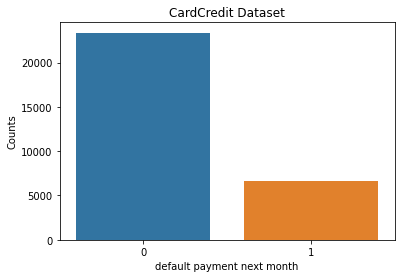

In [ ]:
# per maggior chiarezza, visualizziamo anche il grafico delle classi dei vini
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x="default payment next month", data=df)
plt.title("CardCredit Dataset")
plt.xlabel("default payment next month")
plt.ylabel("Counts")
plt.show()

In [ ]:
# traformiamo il dataframe in una matrice numpy e separiamo il target (la classe, prima colonna, che chiamiamo y)
# dal resto dei dati (le osservazioni, che chiameremo x)

from sklearn import preprocessing

x=df[df.columns.difference(['default payment next month'])].to_numpy()# prendiamo tutti i dati tranne l'ultima colonna -> variabili indipendenti, osservazioni
y=df.to_numpy()[:,-1].astype(int)  # prendiamo solo l'ultima colonna -> variabile dipendente, target

le = preprocessing.LabelEncoder()
for i in range(x.shape[1]):
  x[:,i] = le.fit_transform(x[:,i])

#Print class frequencies through collections counter
import collections
collections.Counter(y)

Counter({1: 6636, 0: 23364})

In [ ]:
import numpy as np

In [ ]:
# vediamo i dati presenti in x e y

np.set_printoptions(suppress=True)
print(x[:10])
print(f'y = {y[:10]}')

[[ 2710  2306   846   377   384   414     2     2     1     4     4     1
      1     0     0     0   494     0     0     0     0]
 [ 2064  1547  2053  2344  2452  2402     2    12     2     1     4     2
      2     2     3     0   699   885   946     0  1797]
 [10068  6073  5886  6135  6365  6480     2     9     2     2     2     2
      2     2     2  1211  1185   885   946   949  3576]
 [12731 12968 13353 10118 10391 10482     2     5     1     2     2     2
      2     2     2  1674  1674  1079  1043  1018   928]
 [ 4628  3418 11227  8476  7794  7708     2     5     1     1     2     1
      2     2     2  1674  7301  5346  4841   647   630]
 [15166 14322 14427  7884  8034  8164     1     5     2     2     2     2
      2     2     2  2111  1490   586   946   949   741]
 [22477 22215 21946 21538 20990 20584     1    51     2     2     2     2
      2     2     2  7585  7345  6958  5977  5525  5471]
 [ 5679   611   779   499   294   824     2    10     2     2     1     1
      2  

In [ ]:
#suddividiamo ora i dati in due dataset, uno per 'allenare' il metodo (training set) 
# e l'altro per testarne l'efficacia (test set). Facciamo in modo che il training set sia il 70% del totale

from sklearn.model_selection import train_test_split # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.30, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

In [ ]:
# visualizziamo gli shape dei vari dataset X_train, X_test, y_train e y_test
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((21000, 21), (21000,), (9000, 21), (9000,))

In [ ]:
# visualizziamo anche le prime 10 righe dell'X_train e dell'y_train per vedere i dati
# eliminiamo la dotazine scientifica per comodità di lettura
np.set_printoptions(suppress=True)
print(x[:10])
print(f'y = {y[:10]}')

[[ 2710  2306   846   377   384   414     2     2     1     4     4     1
      1     0     0     0   494     0     0     0     0]
 [ 2064  1547  2053  2344  2452  2402     2    12     2     1     4     2
      2     2     3     0   699   885   946     0  1797]
 [10068  6073  5886  6135  6365  6480     2     9     2     2     2     2
      2     2     2  1211  1185   885   946   949  3576]
 [12731 12968 13353 10118 10391 10482     2     5     1     2     2     2
      2     2     2  1674  1674  1079  1043  1018   928]
 [ 4628  3418 11227  8476  7794  7708     2     5     1     1     2     1
      2     2     2  1674  7301  5346  4841   647   630]
 [15166 14322 14427  7884  8034  8164     1     5     2     2     2     2
      2     2     2  2111  1490   586   946   949   741]
 [22477 22215 21946 21538 20990 20584     1    51     2     2     2     2
      2     2     2  7585  7345  6958  5977  5525  5471]
 [ 5679   611   779   499   294   824     2    10     2     2     1     1
      2  

In [ ]:
# importiamo il metodo di classificazione K-NN
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# inizializziamo il metodo con n_neighbors=5
neigh = KNeighborsClassifier(n_neighbors=9)

In [ ]:
# "alleniamo" il metodo con i dati del training set
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
# proviamo a fare una previsione sui dati del test set
predict = neigh.predict(X_test)

In [ ]:
# e visualizziamo il risultato (solo i primi dieci vini)
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0 0 0 0 0 0 0 0 0 0]
dati reali presenti nel dataset di test = [1 0 0 0 0 0 0 0 0 0]


In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


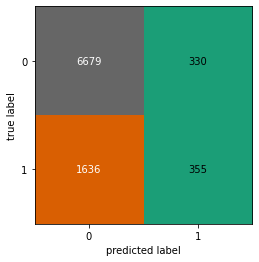

In [ ]:
# valutiamo il nostro metodo:

# visualizziamo la confusion matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [ ]:
# visualizziamo adesso gli indicatori
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      7009
           1       0.52      0.18      0.27      1991

    accuracy                           0.78      9000
   macro avg       0.66      0.57      0.57      9000
weighted avg       0.74      0.78      0.74      9000



implementazione di me stesso nel csv

# metedo dTree

In [ ]:
# importiamo Pandas e il dataframe dal file data/wine.csv
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/default of credit card clients.xls',skiprows=[0])

In [ ]:
import numpy as np

dfnp = df.to_numpy()
x=df.drop(['ID','SEX','AGE','default payment next month'], axis=1).to_numpy()# prendiamo tutti i dati tranne l'ultima colonna -> variabili indipendenti, osservazioni
y=df.to_numpy()[:,-1] # prendiamo solo l'ultima colonna -> variabile dipendente, target
y = y.astype(int)

In [ ]:
df = df.dropna()

In [ ]:
df = df.drop(['ID','SEX','AGE','default payment next month'], axis=1)

In [ ]:
df

,LIMIT_BAL,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,1,2,2,-1,-1,-2,-2,3913,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,-1,2,0,0,0,2,2682,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,0,0,0,0,0,0,29239,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,1,0,0,0,0,0,0,46990,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,2,1,-1,0,-1,0,0,0,8617,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,3,1,0,0,0,0,0,0,188948,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,3,2,-1,-1,-1,-1,0,0,1683,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,2,2,4,3,2,-1,0,0,3565,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,3,1,1,-1,0,0,0,-1,-1645,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size =0.33, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((20100, 21), (20100,), (9900, 21), (9900,))

In [ ]:
# importiamo il metodo che vogliamo utilizzara (tra i tanti disponibili...)
from sklearn import tree

# impostiamo i parametri del metodo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=4, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predict = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0 0 0 0 0 0 0 0 0 0]
dati reali presenti nel dataset di test = [0 1 1 0 0 0 0 0 0 0]


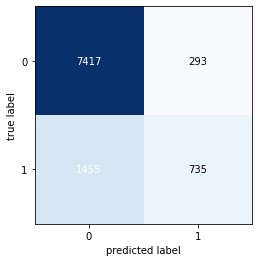

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict))
plt.show()

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7710
           1       0.71      0.34      0.46      2190

    accuracy                           0.82      9900
   macro avg       0.78      0.65      0.68      9900
weighted avg       0.81      0.82      0.80      9900



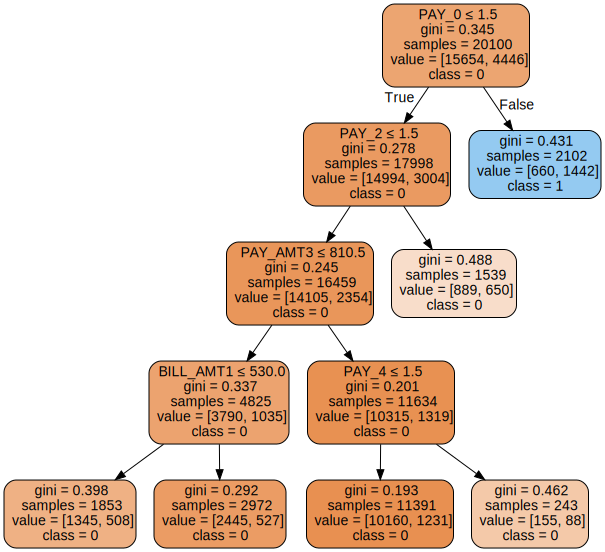

In [ ]:
#save the feature list into a vector (sono i nomi delle colonne del dataset)
features=list(df.columns.values)

import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features[0:],  
                     class_names=['0','1'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('diabetes')
graph